<a href="https://colab.research.google.com/github/mariocsp/Project_AI_2023/blob/main/LSTM_And_LSTM_auto_encoder_for_error_binary_classification_using_multilple_feature_All_About_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset yang digunakan untuk model ini, berisikan data real time dari high voltage converter mosulator (HVCM) dari fasilitas penghasil neutron spalasi. Proses pengumpulan data dilakukan di fasilitas Spenghasil Neutron Spalasi di Oak Ridge, Tennessee, Amerika Serikat. Neutron spalasi adalah sumber neutron yang terdiri dari akselerator berdaya tinggi yang mempercepat ion hidrogen menuju target. Dalam penghasil neutron spalasi, HVCM digunakan untuk memberi daya pada klystron akselerator linier, yang akan digunakan untuk menghasilkan frekuensi radio berdaya tinggi untuk mempercepat ion hidrogen negatif (H-).
Data dari dataset ini didapatkan dari hasil pengumpulan gelombang dari 15 HVCM dalam sistem pendeteksi anomali dari penghasil neutron spasial. 15 HVCM tersebut dikelompokkan kembali menjadi 4 sub-sistem berdasarkan dari tipe yaitu, 1HVCM dari radiofrequency quadrupole(RFQ), 2 HVCM dari drift-tube linac (DTL), 4 HVM dari coupled-cavity linac (CCL), dan 8 HVCM dari superconducting linac (SCL).

File dataset yang diunduh berisikan total 10 file: 8 file berupa data biner, 1 file script py, dan 1 file excel. Untuk lebih jelasnya dapat dilihat pada tabel dibawah.

![picture](https://cdn.discordapp.com/attachments/909759956729864196/1116007795913920593/Screenshot_2023-06-07_071340.png)





link sumber data: https://data.mendeley.com/datasets/kbbrw99vh8/5

link paper: https://www.sciencedirect.com/science/article/pii/S2352340922006679?via%3Dihub

# Mengimport Library yang dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pandas as pd

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/AI2023/hvcm/CCL'

Mounted at /content/drive


In [ ]:
X = np.load(f'{path}.npy')
Y = np.load(f'{path}_labels.npy', allow_pickle=True) 

In [ ]:
x_csv = np.moveaxis(X,-1, 1)
x_csv.shape

(2057, 14, 4500)

Move axis untuk memindahkan axis/dim dari data,
pemindahan ini dilakukan untuk mengkonversi data
menjadi csv agar data lebih mudah divisualisasikan 
dan dieksplor saat dibaca dengan pandas

In [ ]:
#Fungsi untuk konversi ke csv
"""
def ke_df(data,features):
  dict_feat = {i:[] for i in  ['timeseries_idx'] + features}

  for idx, val in enumerate(data):
    ind = list(np.float32(np.ones(val.shape[1]))*idx)
    dict_feat['timeseries_idx'] =  dict_feat['timeseries_idx'] + ind

    for j,nil in enumerate(features):
        dict_feat[nil] = dict_feat[nil] + list(val[j])

  return dict_feat

df = pd.DataFrame.from_dict(ke_df(x_test,features))
df.to_csv(f"{path}.csv")
df.info()
"""
print()

In [ ]:
df_ = pd.read_csv(f'{path}.csv')
df_.head(10)

,Unnamed: 0,timeseries_idx,A+IGBT-I,A+*IGBT-I,B+IGBT-I,B+*IGBT-I,C+IGBT-I,C+*IGBT-I,A-FLUX,B-FLUX,C-FLUX,MOD-V,MOD-I,CB-I,CB-V,DV/DT
0,0,0.0,0.73489,6.1364,9.2801,2.2401,13.9290,9.8489,-0.069420,-0.31591,-0.33798,-716.68,-0.001011,0.045519,2172.6,20.62260
1,1,0.0,0.73489,8.5778,5.6178,4.6815,13.9290,17.1730,-0.093835,-0.30370,-0.31357,-765.51,-0.051549,0.045519,2170.1,5.97330
2,2,0.0,3.17640,8.5778,6.8386,4.6815,32.2400,13.5110,-0.118250,-0.27929,-0.31357,-716.68,-0.026280,0.015000,2170.3,1.09037
3,3,0.0,0.73489,6.1364,6.8386,5.9023,15.1500,9.8489,-0.106040,-0.30370,-0.32578,-643.44,-0.051549,-0.046037,2171.9,-3.79260
4,4,0.0,4.39710,6.1364,9.2801,5.9023,32.2400,11.0700,-0.093835,-0.29149,-0.33798,-692.26,-0.001011,0.015000,2172.3,-6.23410
5,5,0.0,0.73489,6.1364,5.6178,5.9023,12.7080,12.2900,-0.142660,-0.29149,-0.32578,-716.68,-0.026280,0.015000,2170.1,27.94700
6,6,0.0,1.95560,6.1364,5.6178,5.9023,31.0190,12.2900,-0.106040,-0.26708,-0.32578,-692.26,-0.026280,0.045519,2170.3,8.41460
7,7,0.0,3.17640,4.9156,8.0593,7.1230,-3.1614,12.2900,-0.093835,-0.29149,-0.35019,-692.26,-0.001011,0.015000,2172.9,-3.79263
8,8,0.0,1.95560,6.1364,8.0593,5.9023,12.7080,15.9530,-0.081628,-0.27929,-0.30136,-667.85,0.049528,0.015000,2171.4,-6.23410
9,9,0.0,3.17640,6.1364,5.6178,7.1230,11.4870,9.8489,-0.069420,-0.27929,-0.36240,-741.09,0.024259,0.045519,2170.4,1.09040


# Data Cleaning dan Eksplorasi

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9256500 entries, 0 to 9256499
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   timeseries_idx  float64
 2   A+IGBT-I        float64
 3   A+*IGBT-I       float64
 4   B+IGBT-I        float64
 5   B+*IGBT-I       float64
 6   C+IGBT-I        float64
 7   C+*IGBT-I       float64
 8   A-FLUX          float64
 9   B-FLUX          float64
 10  C-FLUX          float64
 11  MOD-V           float64
 12  MOD-I           float64
 13  CB-I            float64
 14  CB-V            float64
 15  DV/DT           float64
dtypes: float64(15), int64(1)
memory usage: 1.1 GB


Dari tampilan 10 data pertama, kita mengetahui bahwa 
beberapa data fitur butuh di normalisasi untuk memundahkan kalkulasi
dan agar modul yang dihasilkan dari proses training tidak bias.
Berikut list fitur yang butuh dinormalisasi


In [ ]:
features=['A+IGBT-I', 'A+*IGBT-I', 'B+IGBT-I', 'B+*IGBT-I', 'C+IGBT-I', 'C+*IGBT-I', 'A-FLUX', 
         'B-FLUX', 'C-FLUX', 'MOD-V', 'MOD-I', 'CB-I', 'CB-V', 'DV/DT']  
feature_nnorm_idx= [0,1,2,3,4,5,9,12,13]
feature_nnorm = [features[i] for i in feature_nnorm_idx]

print(feature_nnorm)

['A+IGBT-I', 'A+*IGBT-I', 'B+IGBT-I', 'B+*IGBT-I', 'C+IGBT-I', 'C+*IGBT-I', 'MOD-V', 'CB-V', 'DV/DT']


Kami melakukan normalisasi data dengan menggunakan bantuan pustaka scikit-learn yaitu dengan menggunakan preprocessing.StandardScaler.
Metode ini menerapkan sifat  Standardization (Z-Score NormalizationNor) dimana metode ini melakukan normalisasi 
dengan standarisasi mengubah data sehingga memiliki mean 0 dan simpangan baku 1.
Metode ini dipilih karena menghilangkan perbedaan skala dalam konteks standarisasi,
maksudnya adalah mengubah skala data sehingga rentang nilai dari setiap fitur menjadi lebih seragam atau sebanding. Berikut fungsi yang kami gunakan

In [ ]:
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalize = df_.copy()
for i in feature_nnorm :
  array_feature = df_[i].values
  array_feature = array_feature.reshape(-1, 1)
  scaler.fit(array_feature)
  df_normalize[[f"{i}"]] = scaler.transform(array_feature)
  
df_normalize.to_csv(f"{path}_normalize.csv")
"""

print()

In [ ]:
df_normalize = pd.read_csv(f"{path}_normalize.csv")
df_normalize.head(10)

,Unnamed: 0.1,Unnamed: 0,timeseries_idx,A+IGBT-I,A+*IGBT-I,B+IGBT-I,B+*IGBT-I,C+IGBT-I,C+*IGBT-I,A-FLUX,B-FLUX,C-FLUX,MOD-V,MOD-I,CB-I,CB-V,DV/DT
0,0,0,0.0,0.625857,0.621531,0.636062,0.615522,0.626562,0.632367,-0.069420,-0.31591,-0.33798,-1.564395,-0.001011,0.045519,0.530564,0.086791
1,1,1,0.0,0.625857,0.624902,0.630980,0.618888,0.626562,0.642766,-0.093835,-0.30370,-0.31357,-1.565259,-0.051549,0.045519,0.518591,-0.003827
2,2,2,0.0,0.629316,0.624902,0.632674,0.618888,0.651726,0.637566,-0.118250,-0.27929,-0.31357,-1.564395,-0.026280,0.015000,0.519548,-0.034032
3,3,3,0.0,0.625857,0.621531,0.632674,0.620571,0.628240,0.632367,-0.106040,-0.30370,-0.32578,-1.563098,-0.051549,-0.046037,0.527212,-0.064237
4,4,4,0.0,0.631046,0.621531,0.636062,0.620571,0.651726,0.634101,-0.093835,-0.29149,-0.33798,-1.563962,-0.001011,0.015000,0.529127,-0.079339
5,5,5,0.0,0.625857,0.621531,0.630980,0.620571,0.624884,0.635833,-0.142660,-0.29149,-0.32578,-1.564395,-0.026280,0.015000,0.518591,0.132098
6,6,6,0.0,0.627587,0.621531,0.630980,0.620571,0.650048,0.635833,-0.106040,-0.26708,-0.32578,-1.563962,-0.026280,0.045519,0.519548,0.011274
7,7,7,0.0,0.629316,0.619845,0.634368,0.622254,0.603076,0.635833,-0.093835,-0.29149,-0.35019,-1.563962,-0.001011,0.015000,0.532001,-0.064237
8,8,8,0.0,0.627587,0.621531,0.634368,0.620571,0.624884,0.641034,-0.081628,-0.27929,-0.30136,-1.563530,0.049528,0.015000,0.524817,-0.079339
9,9,9,0.0,0.629316,0.621531,0.630980,0.622254,0.623206,0.632367,-0.069420,-0.27929,-0.36240,-1.564827,0.024259,0.045519,0.520027,-0.034032


In [ ]:
df_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9256500 entries, 0 to 9256499
Data columns (total 17 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0.1    int64  
 1   Unnamed: 0      int64  
 2   timeseries_idx  float64
 3   A+IGBT-I        float64
 4   A+*IGBT-I       float64
 5   B+IGBT-I        float64
 6   B+*IGBT-I       float64
 7   C+IGBT-I        float64
 8   C+*IGBT-I       float64
 9   A-FLUX          float64
 10  B-FLUX          float64
 11  C-FLUX          float64
 12  MOD-V           float64
 13  MOD-I           float64
 14  CB-I            float64
 15  CB-V            float64
 16  DV/DT           float64
dtypes: float64(15), int64(2)
memory usage: 1.2 GB


In [ ]:
print(f'''mengecek apakah ada nan values dalam data
jumlah data nan pada data adalah {df_normalize.isnull().sum().sum()} ''')

mengecek apakah ada nan values dalam data
jumlah data nan pada data adalah 0 


In [ ]:
label_binary = Y[:,1]

print(label_binary.shape)
print(np.unique(label_binary))

(2057,)
['Fault' 'Run']


In [ ]:
label_multiclass = Y[:,2]
print(label_multiclass.shape)
print(np.unique(label_multiclass))

(2057,)
['+ CB V High Fault' '+ DC I High Fault' '+CB V High Fault'
 '- CB I High Fault' '- CB V Low Fault' '- CBV Low Fault'
 'A+ Driver Fault' 'A+ IGBT I Low Fault' 'A+* Driver Fault'
 'A-* Driver Fault' 'B + Driver Fault' 'B FLUX Low Fault'
 'B+ IGBT I High Fault' 'B+ IGBT I Low Fault' 'B+* Driver Fault'
 'B+* IGBT I High Fault' 'B+* IGBT I Low Fault' 'B- Driver Fault'
 'B-* Driver Fault' 'C FLUX High Fault' 'C FLUX Low Fault'
 'C+ Driver Fault' 'C+ IGBT I High Fault' 'C+* Driver Fault'
 'C- Driver Fault' 'DV/DT High Fault' 'DV/DT Low Fault'
 'EPICS HeartBt Fault' 'Fiber Fault' 'I High Fault' 'I Low Fault'
 'Interpulse High Fault' 'MOD I High Fault' 'MOD V High Fault' 'Normal'
 'O Panel- Local Check' 'SCR AC Input Fault' 'SNS PPS Missing']


In [ ]:
df_label = pd.DataFrame([label_binary,label_multiclass]).transpose()
df_label.columns = ['label_binary', 'label_multiclass']

label_binary = df_label['label_binary'] == 'Run'
label_binary = label_binary.astype(np.int32)

df_label['label_binary'] = label_binary
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   label_binary      2057 non-null   int32 
 1   label_multiclass  2057 non-null   object
dtypes: int32(1), object(1)
memory usage: 24.2+ KB


In [ ]:
df_label['label_binary'].value_counts().to_frame()

,label_binary
1,1752
0,305


In [ ]:
df_label['label_multiclass'].value_counts().to_frame()

,label_multiclass
Normal,1752
Fiber Fault,77
SCR AC Input Fault,48
DV/DT High Fault,22
B+ IGBT I Low Fault,18
B-* Driver Fault,14
B- Driver Fault,14
A+ IGBT I Low Fault,14
MOD I High Fault,12
C FLUX Low Fault,10


data tidak dapat digunakan untuk melakukan multiclass classifiction
sebaran data yang kurang optimal

In [ ]:
print(f"""
Ukuran dari data X adalah: {X.shape}
Ukuran dari data Y adalah: {Y.shape}

data X terdiri dari {X.shape[0]} timeseries 
dengan jumlah data point {X.shape[1]}
pada masing - masing data point terdapat {X.shape[2]} fitur

keempatbelas fitur tersebut adalah {np.array(features)}

masing-masing timeseries dilabeli dengan label yang menandakan kesuksesan 
berjalannya eksperimen. Terdapat dua jenis label yaitu label binary
dan label multiclass. Berikut jenis jenis label binary:

{np.unique(Y[:,1])}

berikut jenis-jenis label multiclass

{np.unique(Y[:,2])}

terdapat {np.shape(np.unique(Y[:,1]))[0]} label binary dan 
{np.shape(np.unique(Y[:,2]))[0]} jenis label multiclass

berikut distribusi masing-masing jenis label
""")


Ukuran dari data X adalah: (2057, 4500, 14)
Ukuran dari data Y adalah: (2057, 3)

data X terdiri dari 2057 timeseries 
dengan jumlah data point 4500
pada masing - masing data point terdapat 14 fitur

keempatbelas fitur tersebut adalah ['A+IGBT-I' 'A+*IGBT-I' 'B+IGBT-I' 'B+*IGBT-I' 'C+IGBT-I' 'C+*IGBT-I'
 'A-FLUX' 'B-FLUX' 'C-FLUX' 'MOD-V' 'MOD-I' 'CB-I' 'CB-V' 'DV/DT']

masing-masing timeseries dilabeli dengan label yang menandakan kesuksesan 
berjalannya eksperimen. Terdapat dua jenis label yaitu label binary
dan label multiclass. Berikut jenis jenis label binary:

['Fault' 'Run']

berikut jenis-jenis label multiclass

['+ CB V High Fault' '+ DC I High Fault' '+CB V High Fault'
 '- CB I High Fault' '- CB V Low Fault' '- CBV Low Fault'
 'A+ Driver Fault' 'A+ IGBT I Low Fault' 'A+* Driver Fault'
 'A-* Driver Fault' 'B + Driver Fault' 'B FLUX Low Fault'
 'B+ IGBT I High Fault' 'B+ IGBT I Low Fault' 'B+* Driver Fault'
 'B+* IGBT I High Fault' 'B+* IGBT I Low Fault' 'B- Driver Fault'
 'B-

# Visualisasi Data

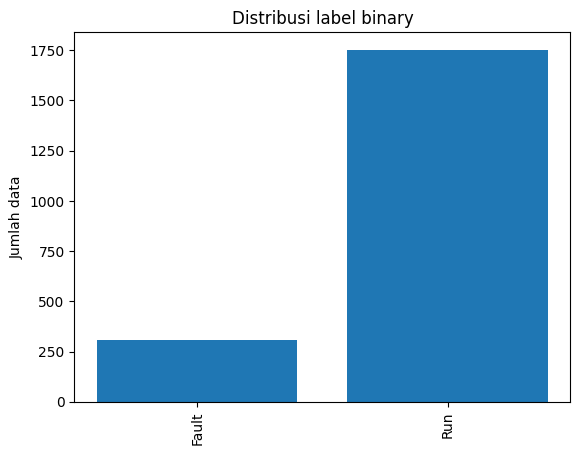

In [ ]:
unique_bin, counts_bin = np.unique(Y[:,1], return_counts=True)

plt.bar([1,2],counts_bin, tick_label = unique_bin)

plt.xticks(rotation=90)
plt.ylabel('Jumlah data')
plt.title('Distribusi label binary')
plt.show()


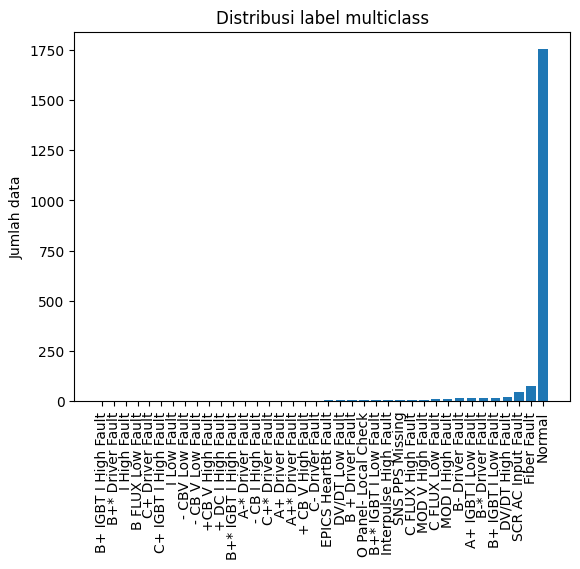

In [ ]:
unique_mul, counts_mul = np.unique(Y[:,2], return_counts=True)

_ = pd.DataFrame({
    'Features': unique_mul,
    'counts': counts_mul})

_.sort_values(by='counts', inplace=True)

plt.bar([i for i in range(38)],_['counts'], tick_label = _['Features'])

plt.xticks(rotation=90)
plt.ylabel('Jumlah data')
plt.title('Distribusi label multiclass')
plt.show()

In [ ]:
time=np.arange(X.shape[1]) * 400e-9   

fault_indices, normal_indices = np.where(Y[:,1] == 'Fault')[0], np.where(Y[:,1] == 'Run')[0]
Xnormal, Xanomaly = X[normal_indices,:,:], X[fault_indices,:,:]  
Ynormal, Yanomaly = Y[normal_indices,:], Y[fault_indices,:]   



In [ ]:
def plot_data(data,label):
  rows, cols = 4, 4

  random_idx = int(np.random.randint(0, len(data), size=1))
  data = data[random_idx]
  
  label = label[:,1][random_idx]

  fig, axs = plt.subplots(4,4)
  fig.set_figheight(22)
  fig.set_figwidth(22)


  for j in range(14):

    fig.add_subplot(rows, cols, j+1)

    plt.plot(time, data[:,j]) 
    plt.xlabel('Time (s)')
    plt.title(features[j]) 

    plt.xticks([])
    plt.yticks([])

    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

  fig.show()

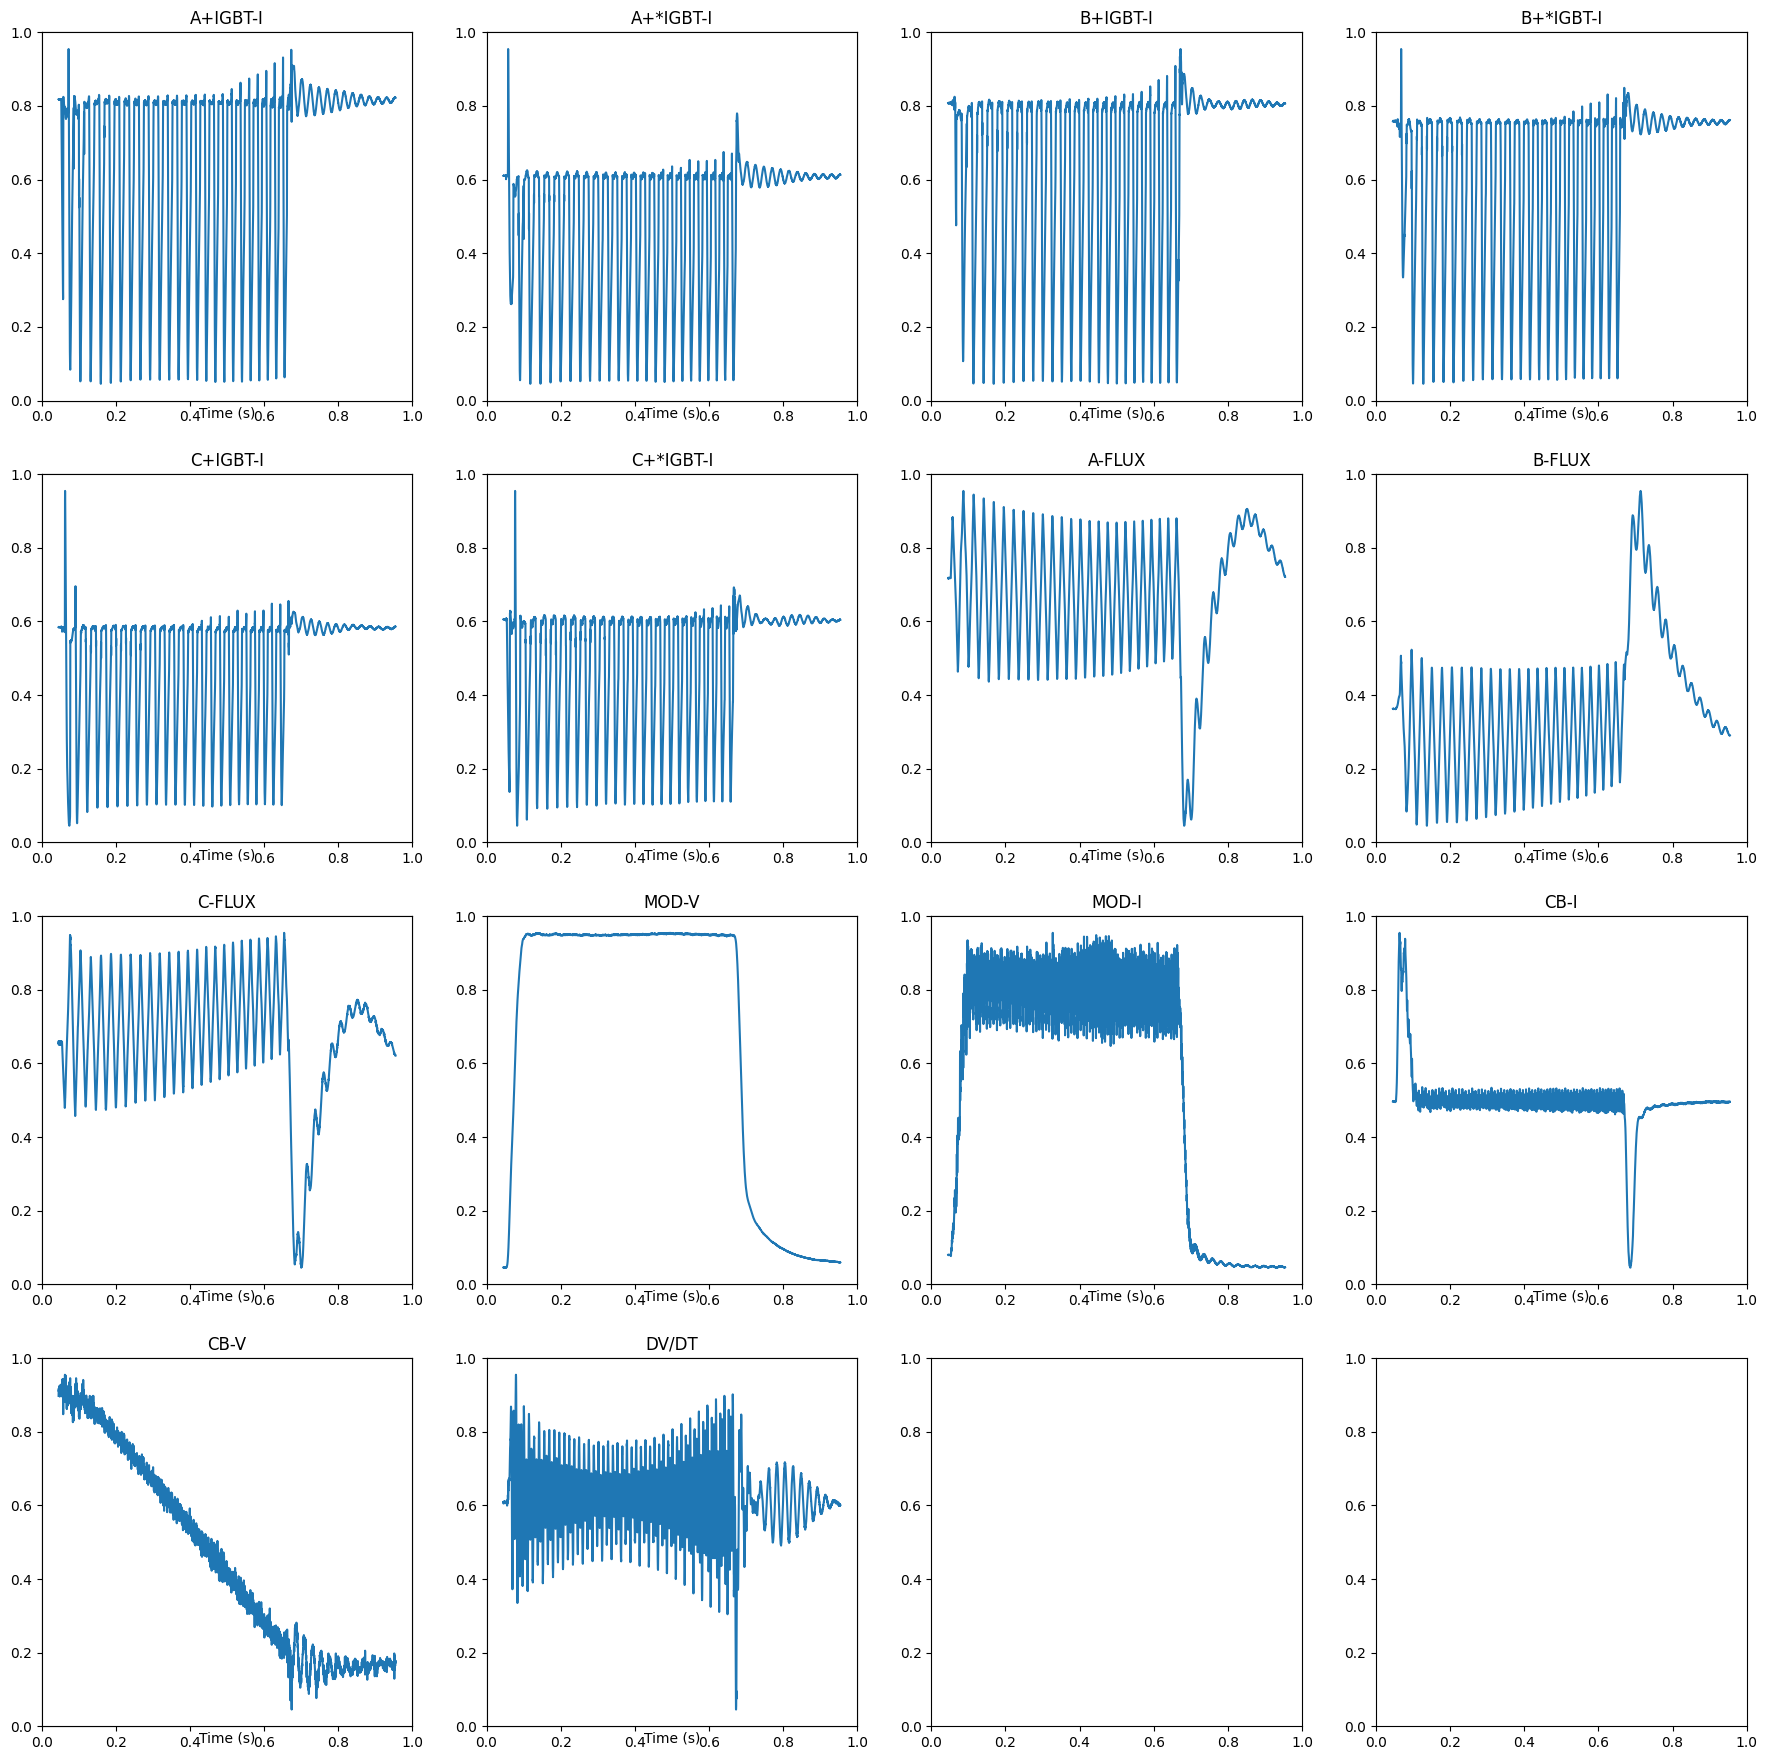

In [ ]:
plot_data(Xnormal,Ynormal)

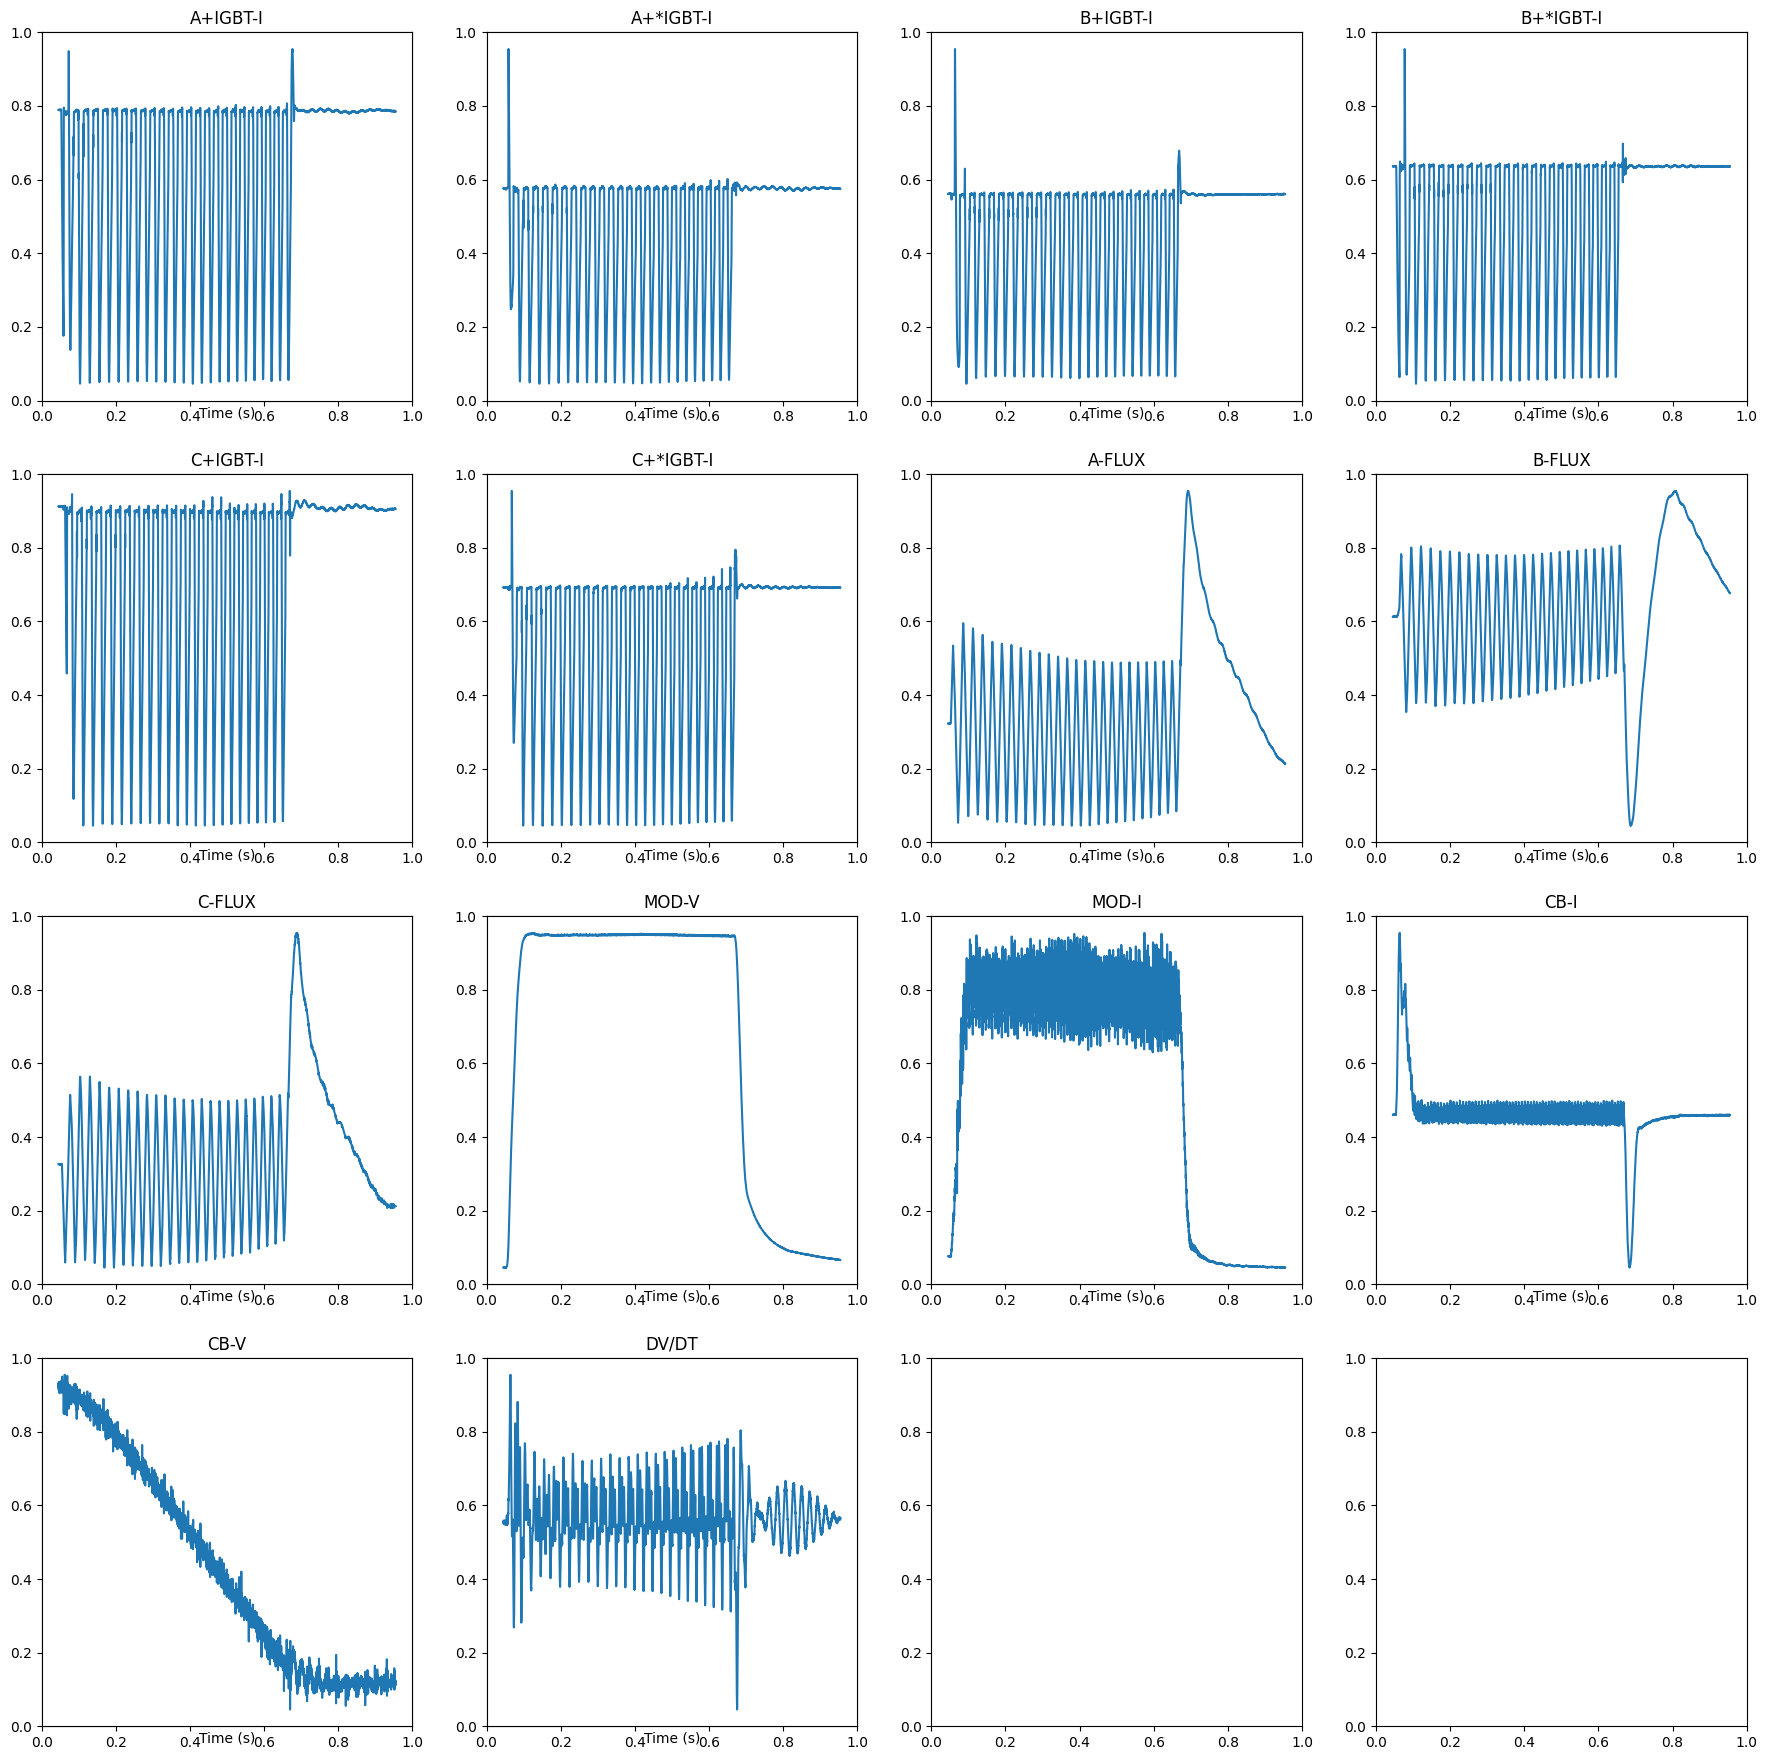

In [ ]:
plot_data(Xanomaly,Yanomaly)

In [ ]:
def plot_data_compare(data_normal,data_anomaly):
  rows, cols = 4, 4

  random_idx = int(np.random.randint(0, len(data_anomaly), size=1))
  data_normal = data_normal[random_idx]
  data_anomaly = data_anomaly[random_idx]
  
  fig, axs = plt.subplots(4,4)
  fig.set_figheight(22)
  fig.set_figwidth(22)


  for j in range(14):

    fig.add_subplot(rows, cols, j+1)

    plt.plot(time, data_normal[:,j],'b-', label = 'normal') 
    plt.plot(time, data_anomaly[:,j],'r-', label = '') 
    
    
    plt.xlabel('Time (s)')
    plt.title(features[j]) 

    plt.xticks([])
    plt.yticks([])

    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

  fig.show()

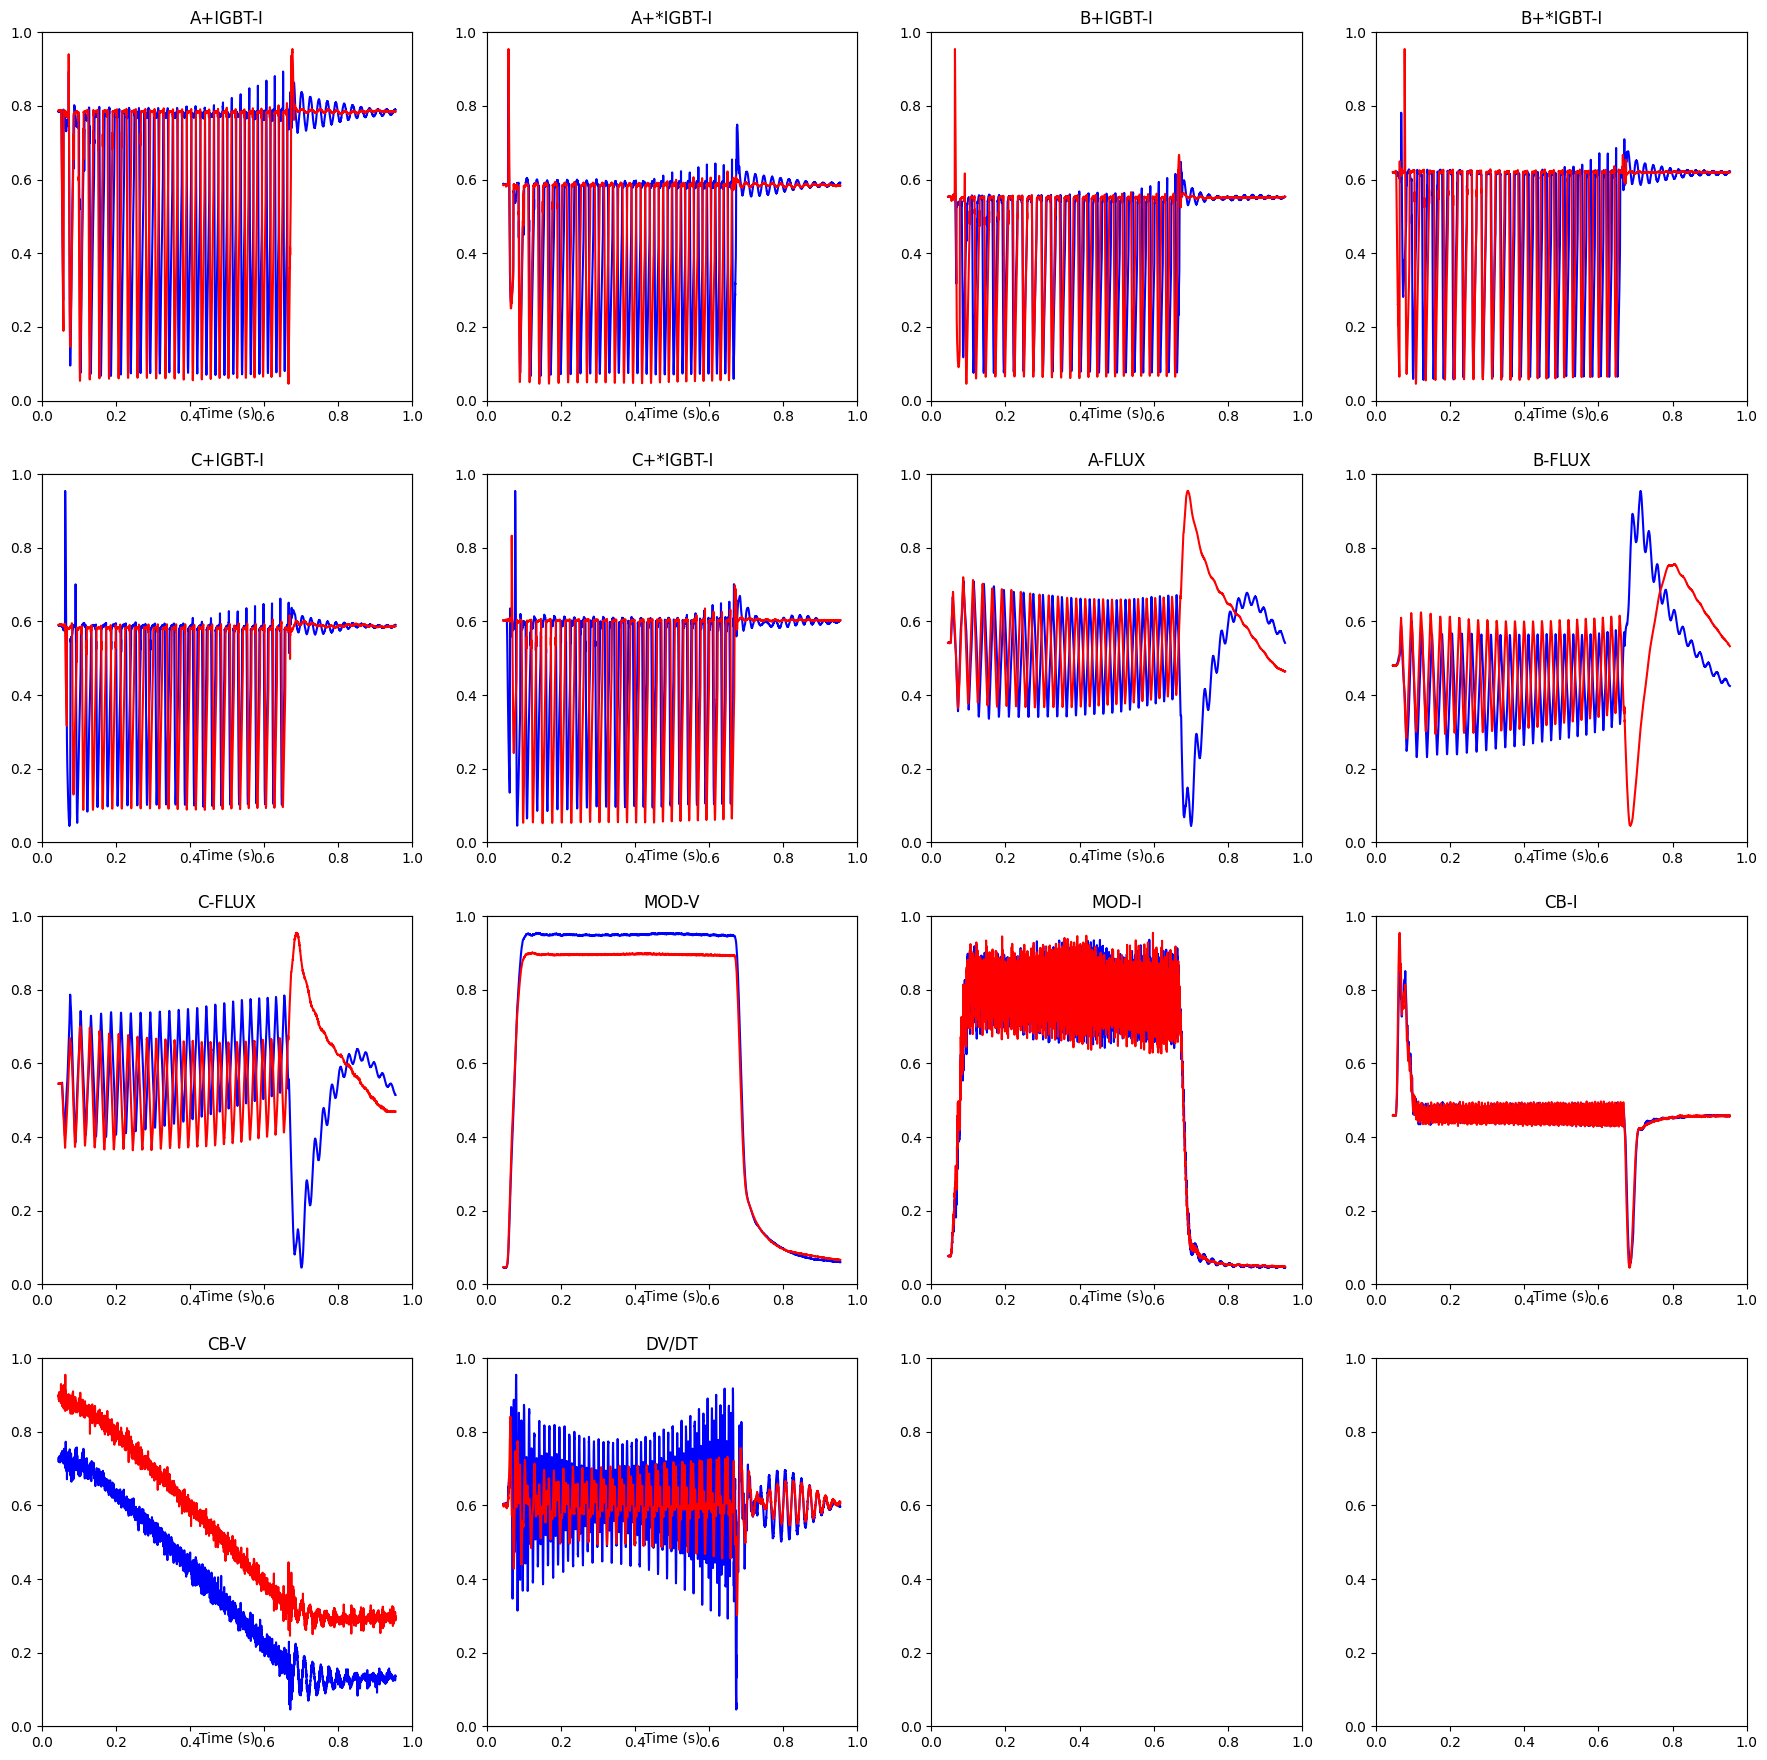

In [ ]:
plot_data_compare(Xnormal,Xanomaly)

In [ ]:
from sklearn.preprocessing import StandardScaler
X__normalize = X.copy()
scaler = StandardScaler()
for i in feature_nnorm_idx :
  array_feature =  X[:,:,i]
  #array_feature = array_feature.reshape(-1, 1)
  scaler.fit(array_feature)
  X__normalize[:,:,i] = scaler.transform(array_feature)


In [ ]:
time=np.arange(X.shape[1]) * 400e-9   

fault_indices, normal_indices = np.where(Y[:,1] == 'Fault')[0], np.where(Y[:,1] == 'Run')[0]

Xnormal_normalize, Xanomaly_normalize = X__normalize[normal_indices,:,:], X__normalize[fault_indices,:,:]  
Ynormal, Yanomaly = Y[normal_indices,:], Y[fault_indices,:]

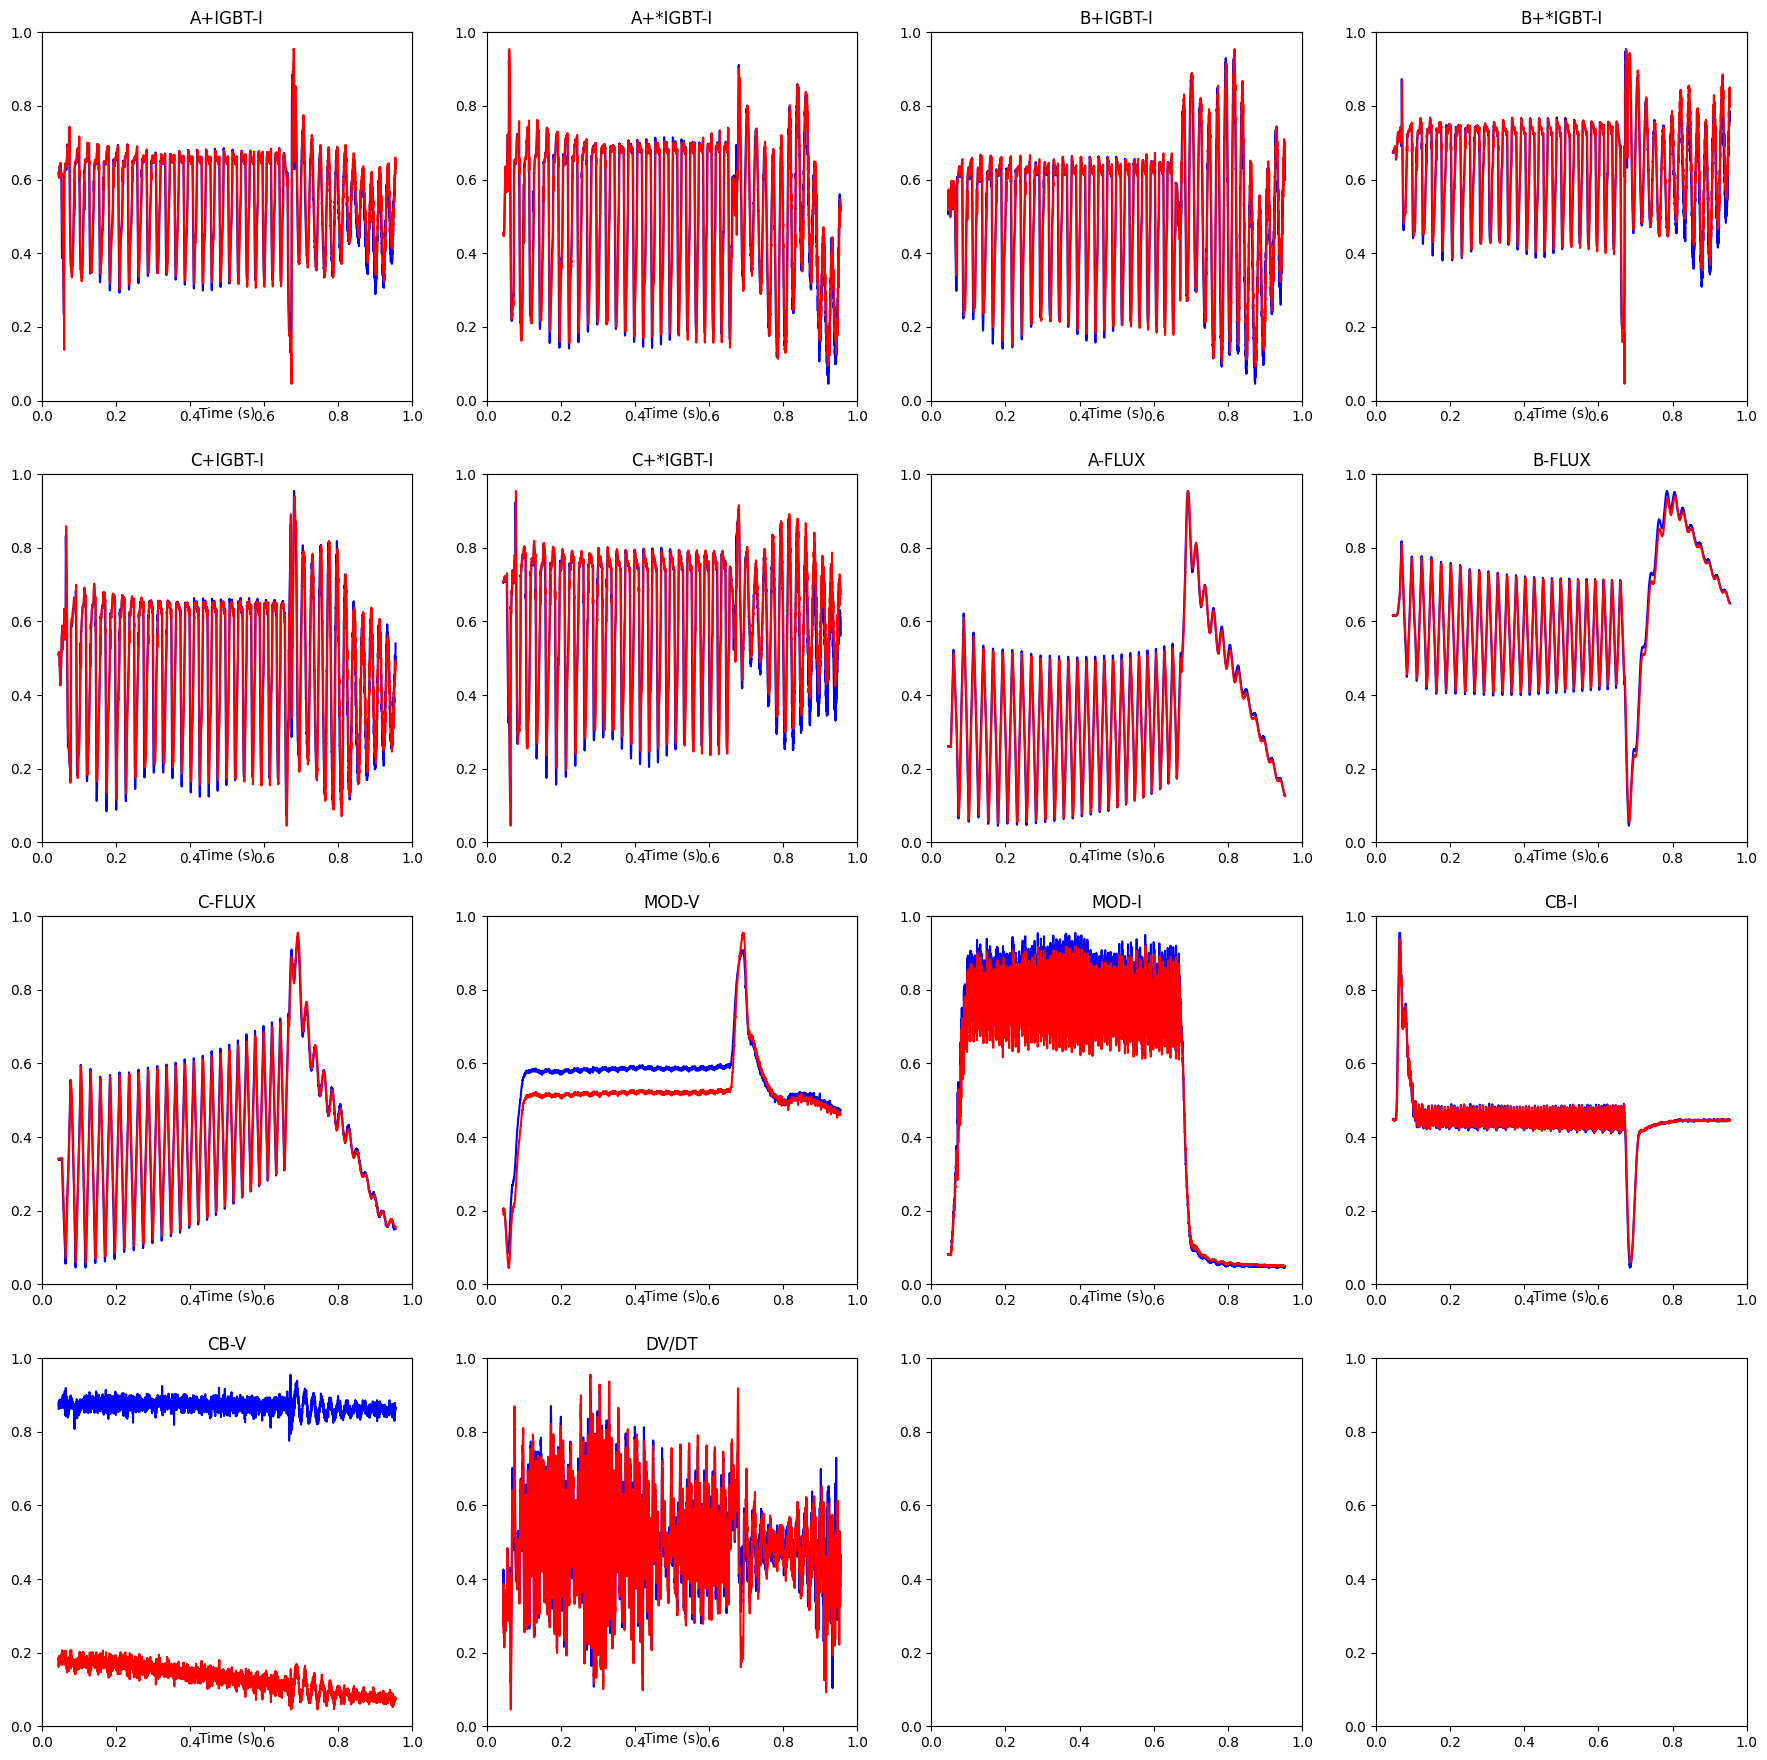

In [ ]:
plot_data_compare(Xnormal_normalize,Xanomaly_normalize)